## Deaths Attributable to Climate Change (by Region)
Source: World Health Organization
Links:
    
    https://www.who.int/data/gho/data/indicators/indicator-details/GHO/climate-change-attributable-deaths-(000)-in-children-under-5-years

	https://www.who.int/data/gho/data/indicators/indicator-details/GHO/climate-change-attributable-deaths

In [210]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

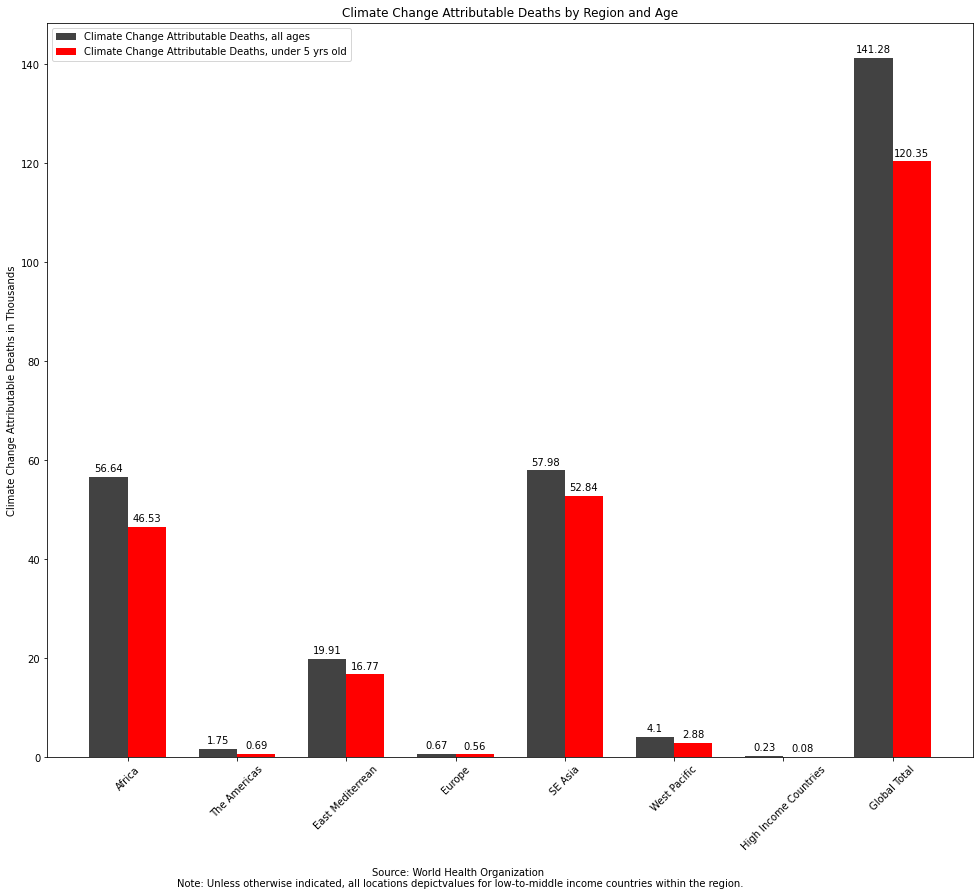

In [209]:
CCAD = requests.get("https://ghoapi.azureedge.net/api/CC_1").json()
CCAD_under_five = requests.get("https://ghoapi.azureedge.net/api/CC_5").json()

CCAD_values = CCAD.get('value')
CCAD_under_five_values = CCAD_under_five.get('value')

CCAD_values.extend(CCAD_under_five_values)
combined_data = CCAD_values
CCAD_values = CCAD.get('value') # to reset the value to avoid confusion

CC1_numeric_values = []
CC5_numeric_values = []

for item in combined_data:
    if item["IndicatorCode"] == 'CC_1':
        CC1_numeric_values.append(item['NumericValue'])
    elif item["IndicatorCode"] == 'CC_5':
        CC5_numeric_values.append(item['NumericValue'])
    else:
        print('There are unexpected values brought in from the APIs.')

labels = ['Africa','The Americas','East Mediterrean','Europe','SE Asia', \
          'West Pacific','High Income Countries','Global Total']
x = np.arange(len([item["SpatialDim"] for item in combined_data])/2) # list of labels
width = 0.35
        
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, CC1_numeric_values, width, \
                label='Climate Change Attributable Deaths, all ages', color='#424242')
rects2 = ax.bar(x + width/2, CC5_numeric_values, width, \
                label='Climate Change Attributable Deaths, under 5 yrs old', color='red')

ax.set_ylabel('Climate Change Attributable Deaths in Thousands')
ax.set_title('Climate Change Attributable Deaths by Region and Age')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc='upper left')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.text(0.5, 0, 'Source: World Health Organization \n' \
         + 'Note: Unless otherwise indicated, all locations depict' \
         + 'values for low-to-middle income countries within the region.', ha='center')


fig.tight_layout()
fig.subplots_adjust(top=1)
fig.subplots_adjust(bottom=0.15)

fig.set_size_inches(15, 12)
fig.patch.set_alpha(1)
plt.show()
